# Read data

In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
data = pd.read_csv("data/2021.12.21_project_data.csv", sep="\t")
to_pred = "16-B"

In [75]:
booleans = ["zgrzytanie", "zaciskanie", "sztywnosc", "ograniczone otwieranie", "bol miesni", "przygryzanie", "cwiczenia", "szyna", "starcie-przednie", "starcie-boczne", "ubytki klinowe", "pekniecia szkliwa", "impresje jezyka", "linea alba", "przerost zwaczy", "tkliwosc miesni"]
interleukinas = ["Unnamed: 0",
            "Interleukina – 11B",
            "Interleukina – 11P",
            "Interleukina – 16B",
            "Interleukina – 16P",
            "Interleukina – 24B",
            "Interleukina – 24P",
            "Interleukina – 31B",
            "Interleukina – 31P",
            "Interleukina – 36B",
            "Interleukina – 36P",
            "Interleukina – 44B",
            "Interleukina – 44P"]


In [76]:
# change str percentage columns to floats
data["API"] = data["API"].apply(lambda x: float(x.replace("%", "")) / 100)
data["SBI"] = data["SBI"].apply(lambda x: float(x.replace("%", "")) / 100)


In [77]:
data.drop(columns=booleans, axis=1, inplace=True)
data.drop(columns=interleukinas, axis=1, inplace=True)

In [78]:
gender_map = {
    "m": 0,
    "k": 1
}

# change gender data to numbers
data["plec"] = data["plec"].apply(lambda x: gender_map[x])


y_cols = ["16-B", "16-P", "11-B", "11-P", "24-B", "24-P", "36-B", "36-P", "31-B", "31-P", "44-B", "44-P"]
y = data[to_pred]

In [79]:
# import seaborn as sns
# from scipy import stats
# from scipy.stats import norm, skew

# for out in y_cols:
#     sns.distplot(data[out], fit=norm)
#     (mu, sigma) = norm.fit(data[out])
#     print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
#     #Now plot the distribution
#     plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#                 loc='best')
#     plt.ylabel('Frequency')
#     plt.title(f'{out} distribution')
    
#     #Get also the QQ-plot
#     fig = plt.figure()
#     res = stats.probplot(data[out], plot=plt)
#     plt.show()

In [80]:
# sns.set()
# cols = [
# "24-B",       
# "PPD - 31 B",       
# "GI - 24",       
# "GI - 31",       
# "PI - 44",       
# "PPD - 11"]       
# # cols = data.columns #['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# sns.pairplot(data[cols], height = 2.5)
# plt.show();

do odrzucenia:
TWI
zgrzytanie
zaciskanie
sztywnosc
ograniczone otwieranie ???
bol miesni
przygryzanie
cwiczenia ???
szyna ???
starcie-przednie
starcie-boczne
ubytki klinowe
pekniecia 
impresje jezyka
linea alba
przerost zwaczy
tkliwosc miesni

In [81]:
data.drop(columns=y_cols, axis=1, inplace=True)
data = data[["API", "SBI", "PI - 16", "GI - 16", "PPD - 16", "PPD - 16 B", "TWI - 16 suma"]]
data.head(10)

,API,SBI,PI - 16,GI - 16,PPD - 16,PPD - 16 B,TWI - 16 suma
0,0.5172,0.0667,0.00,0.00,1.46,1.5,1
1,0.4231,0.0385,0.05,0.37,0.77,0.7,2
2,0.1538,0.0345,0.00,0.26,1.32,1.2,0
3,0.1667,0.0667,0.30,0.75,1.30,0.5,3
4,0.3846,0.0000,0.57,0.75,0.97,0.5,1
5,0.0769,0.0000,1.01,0.75,1.92,0.5,1
6,0.0000,0.0385,0.00,0.34,0.75,1.5,2
7,0.5172,0.0000,0.48,0.23,0.79,0.5,3
8,0.1852,0.0667,0.00,0.29,1.02,0.9,0
9,0.2069,0.0417,0.18,0.00,0.75,0.9,1


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, SGDRegressor
from sklearn.multioutput import MultiOutputRegressor

def test_pred(clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    mae = mean_absolute_error(y_test, pred)
    print(f"{clf.__class__.__name__}  Score: ", score, " Mae: ", mae)
    return mae




In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

test_pred(SVR(kernel="rbf", C=10))
test_pred(Lasso(alpha=0.1))
test_pred(Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression(fit_intercept=False))]))

SVR  Score:  -0.16720316648351186  Mae:  13.797011919694253
Lasso  Score:  0.011712306272618545  Mae:  16.69792444655378
Pipeline  Score:  -0.001328457994597132  Mae:  16.568569057620085


16.568569057620085

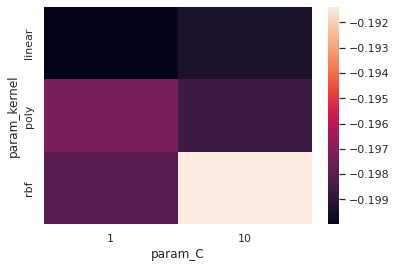

In [87]:
from sklearn.model_selection import GridSearchCV 

parameters = {
    'kernel': ('linear', 'rbf', 'poly'), 
    'C':[1, 10],
    'degree': [1, 2, 3, 4, 5, 6],
    
}
clf = GridSearchCV(SVR(), parameters, cv=10)
clf.fit(X_train, y_train)

pvt = pd.pivot_table(
    pd.DataFrame(clf.cv_results_),
    values='mean_test_score', 
    index='param_kernel', 
    columns='param_C'
)

ax = sns.heatmap(pvt)